In [292]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [293]:
df = pd.read_csv('data/price.csv')
df_AAPL = df.loc[df['Ticker']=='AAPL']
data = df_AAPL['Adj Close'].pct_change()*100

In [294]:
data = pd.DataFrame(data.rename("Today"))

In [295]:
for i in range(1,6):
    data['Lag ' + str(i)] = data['Today'].shift(i)


In [296]:
data['Volume'] = df_AAPL.Volume.shift(1).values/100_000_000
data=data.dropna()
data

,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
6,0.278742,-0.571951,0.658805,-3.565715,-1.114948,-4.398874,1.891268
7,1.094004,0.278742,-0.571951,0.658805,-3.565715,-1.114948,1.425108
8,-3.199757,1.094004,0.278742,-0.571951,0.658805,-3.565715,1.275944
9,-0.930647,-3.199757,1.094004,0.278742,-0.571951,0.658805,1.628148
10,1.299271,-0.930647,-3.199757,1.094004,0.278742,-0.571951,1.771516
...,...,...,...,...,...,...,...
1003,-2.626426,-1.959361,0.592632,1.466116,-2.168021,0.378179,0.351959
1004,-2.114827,-2.626426,-1.959361,0.592632,1.466116,-2.168021,0.692460
1005,4.859390,-2.114827,-2.626426,-1.959361,0.592632,1.466116,0.837638
1006,0.189150,4.859390,-2.114827,-2.626426,-1.959361,0.592632,1.113809


In [297]:
data['Direction'] = [1 if i > 0 else 0 for i in data['Today']]
data

,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,0.278742,-0.571951,0.658805,-3.565715,-1.114948,-4.398874,1.891268,1
7,1.094004,0.278742,-0.571951,0.658805,-3.565715,-1.114948,1.425108,1
8,-3.199757,1.094004,0.278742,-0.571951,0.658805,-3.565715,1.275944,0
9,-0.930647,-3.199757,1.094004,0.278742,-0.571951,0.658805,1.628148,0
10,1.299271,-0.930647,-3.199757,1.094004,0.278742,-0.571951,1.771516,1
...,...,...,...,...,...,...,...,...
1003,-2.626426,-1.959361,0.592632,1.466116,-2.168021,0.378179,0.351959,0
1004,-2.114827,-2.626426,-1.959361,0.592632,1.466116,-2.168021,0.692460,0
1005,4.859390,-2.114827,-2.626426,-1.959361,0.592632,1.466116,0.837638,1
1006,0.189150,4.859390,-2.114827,-2.626426,-1.959361,0.592632,1.113809,1


In [298]:
X= data.drop(['Direction'],axis=1)
y = data['Direction']


In [299]:
train_size = round(0.8*len(df_AAPL))
data_train,data_test=X.iloc[:train_size],X.iloc[train_size:]
X_train,y_train,X_test,y_test = np.array(X.iloc[:train_size]),np.array(y.iloc[:train_size]),np.array(X.iloc[train_size:]),np.array(y.iloc[train_size:])

In [300]:
LogisR = LogisticRegression().fit(X_train, y_train)
y_pred = LogisR.predict(X_test)

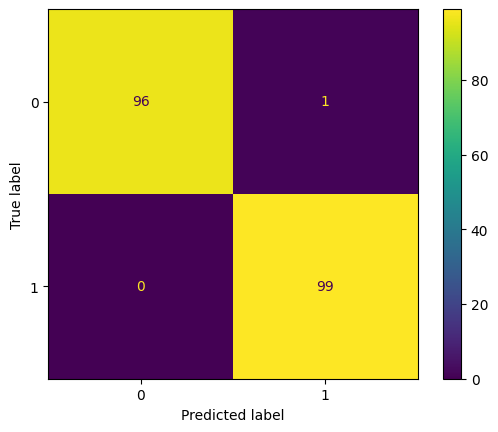

In [301]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()